# Investigating the Cybersecurity Intrusion Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Comment created in john-feature branch

In [10]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/62/27/585859e72e117fe861c2079bcba35591a84f801e21bc1ab85bce6ce60305/scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/ff/ba/31c7a8131152822b3a2cdeba76398ffb404d81d640de98287d236da90c49/scipy-1.15.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
df = pd.read_csv('../data/cybersecurity_intrusion_data.csv')
df.head(3)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1


### EDA

In [13]:
df.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [14]:
df.dtypes

session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object

In [15]:
df['encryption_used'].value_counts()

encryption_used
AES    4706
DES    2865
Name: count, dtype: int64

In [16]:
# Create a new dataframe with only the numeric columns
df_numeric = df.select_dtypes(include=np.number)

# Show the correlation matrix, showing only features with a correlation of 0.5 or higher
df_numeric_corr = df_numeric.corr()
df_numeric_corr


,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
network_packet_size,1.000000,-0.001890,0.021650,0.002320,-0.011676,-0.001255,-0.006798
login_attempts,-0.001890,1.000000,0.006392,-0.002618,-0.013507,0.007349,0.277320
session_duration,0.021650,0.006392,1.000000,-0.005077,0.019375,0.012930,0.041602
ip_reputation_score,0.002320,-0.002618,-0.005077,1.000000,0.015613,-0.003146,0.211540
failed_logins,-0.011676,-0.013507,0.019375,0.015613,1.000000,0.006131,0.363726
unusual_time_access,-0.001255,0.007349,0.012930,-0.003146,0.006131,1.000000,0.008652
attack_detected,-0.006798,0.277320,0.041602,0.211540,0.363726,0.008652,1.000000


### Visualize the correlation matrix as a heatmap

<Axes: >

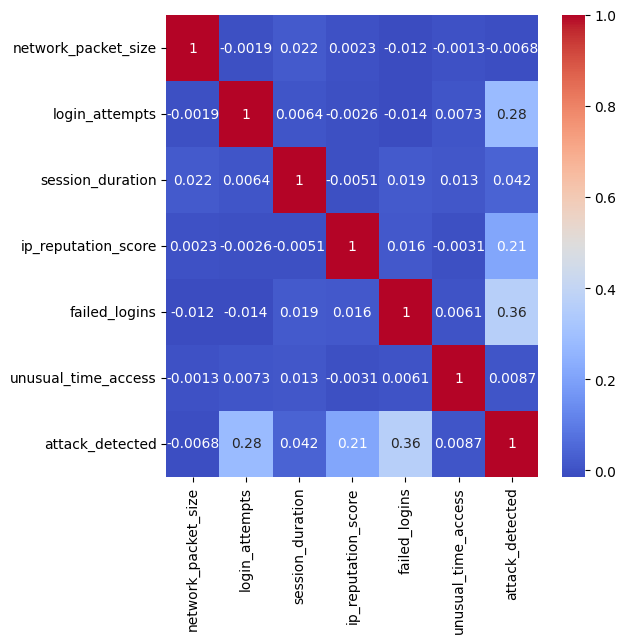

In [17]:
# Create a heatmap of the correlation matrix

plt.figure(figsize=(6, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

### Create a pipeline to preprocess the data and train a model

Accuracy: 0.73
[[1257  319]
 [ 465  821]]


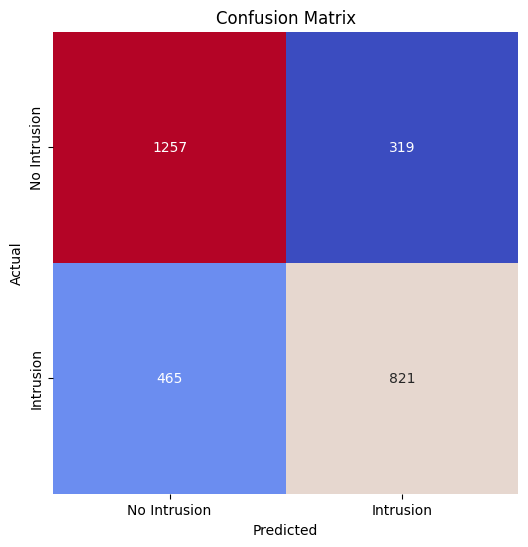

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a new dataframe with only the numeric columns
df_numeric = df.select_dtypes(include=np.number)

# Split the data into features and target
X = df_numeric.drop(columns='attack_detected')
y = df_numeric['attack_detected']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d', cbar=False, xticklabels=['No Intrusion', 'Intrusion'], yticklabels=['No Intrusion', 'Intrusion'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def pipeline_logistic_regression():
    pipeline = Pipeline(
        [
            ('feature_scaling', StandardScaler()),
            ('feat_selection', SelectFromModel(LogisticRegression(random_state=101))),
            ('model', LogisticRegression(random_state=101))
        ]
    )
    return pipeline

In [23]:
pipeline = pipeline_logistic_regression()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=LogisticRegression(random_state=101))),
                ('model', LogisticRegression(random_state=101))])

In [24]:
def logistic_regression_coef(model, columns):
    """
    Prints the coefficients of a logistic regression model.

    Parameters:
    - model: The trained logistic regression model.
    - columns: The column names corresponding to the coefficients.

    Returns:
    None
    """
    coeff_df = pd.DataFrame(
        model.coef_, index=["Coefficient"], columns=columns
    ).T.sort_values(["Coefficient"], key=abs, ascending=False)
    print(coeff_df)

In [25]:
logistic_regression_coef(
    model=pipeline["model"],
    columns=X_train.columns[pipeline["feat_selection"].get_support()],
)

                     Coefficient
failed_logins           0.970544
login_attempts          0.742733
ip_reputation_score     0.577552


In [ ]:
# loads confusion_matrix and classification_report from sklearn
from sklearn.metrics import classification_report, confusion_matrix


def confusion_matrix_and_report(X, y, pipeline, label_map):
    """
    

    Args:
        X (array-like): The input features.
        y (array-like): The target values.
        pipeline (object): The trained pipeline model.
        label_map (list): The list of labels for the target values.

    Returns:
        None

    This function performs the following steps:
    - Predicts the target values based on the input features using the provided pipeline.
    - Computes and displays the confusion matrix, which compares the predicted values with the actual values.
      The predicted values are shown as rows, and the actual values are shown as columns in the matrix.
    - Displays the classification report, which provides metrics such as precision, recall, and F1-score.

    """

    prediction = pipeline.predict(X)

    print("---  Confusion Matrix  ---")
    print(
        pd.DataFrame(
            confusion_matrix(y_true=prediction, y_pred=y),
            columns=[["Actual " + sub for sub in label_map]],
            index=[["Prediction " + sub for sub in label_map]],
        )
    )
    print("\n")

    print("---  Classification Report  ---")
    print(classification_report(y, prediction, target_names=label_map), "\n")


def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_map):
    """
    Calculates and displays the performance metrics of a classification model.

    Parameters:
    - X_train (array-like): The feature matrix of the training set.
    - y_train (array-like): The target labels of the training set.
    - X_test (array-like): The feature matrix of the test set.
    - y_test (array-like): The target labels of the test set.
    - pipeline (object): The trained classification pipeline.
    - label_map (list): A list containing the labels for the target variable.

    Returns:
    None

    This function calculates and displays the confusion matrix and classification report
    for both the training set and the test set. The confusion matrix provides a summary
    of the model's performance by showing the number of true positives, true negatives,
    false positives, and false negatives. The classification report provides additional
    performance metrics such as precision, recall, and F1-score.

    Example usage:
    clf_performance(X_train, y_train, X_test, y_test, pipeline, ['Malignant', 'Benign'])
    """
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_map)

    print("#### Test Set ####\n")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_map)


## Some stuff on main branch

In [28]:
clf_performance(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    pipeline=pipeline,
    label_map=["Attack", "No Attack"],
)

#### Train Set #### 

---  Confusion Matrix  ---
                     Actual Attack Actual No Attack
Prediction Attack             2916             1028
Prediction No Attack           781             1950


---  Classification Report  ---
              precision    recall  f1-score   support

      Attack       0.74      0.79      0.76      3697
   No Attack       0.71      0.65      0.68      2978

    accuracy                           0.73      6675
   macro avg       0.73      0.72      0.72      6675
weighted avg       0.73      0.73      0.73      6675
 

#### Test Set ####

---  Confusion Matrix  ---
                     Actual Attack Actual No Attack
Prediction Attack             1260              461
Prediction No Attack           316              825


---  Classification Report  ---
              precision    recall  f1-score   support

      Attack       0.73      0.80      0.76      1576
   No Attack       0.72      0.64      0.68      1286

    accuracy                   